In [69]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [70]:
players=pd.read_csv('/content/players.csv')

In [71]:
players

,nflId,height,weight,birthDate,collegeName,Position,displayName
0,42901,6-1,208,1992-07-25,James Madison,SS,Dean Marlowe
1,43501,6-0,220,1994-08-11,Central Michigan,FS,Kavon Frazier
2,43534,6-0,205,1993-06-02,Illinois,SS,Clayton Fejedelem
3,43535,6-1,235,1992-12-22,Temple,MLB,Tyler Matakevich
4,44174,6-1,236,1993-02-22,Texas Tech,ILB,Sam Eguavoen
...,...,...,...,...,...,...,...
2727,33216,6-3,320,06/16/1986,Central Florida,G,Josh Sitton
2728,33184,6-3,265,05/02/1985,Winston-Salem State,DE,William Hayes
2729,45651,5-9,198,06/16/1993,Iowa,WR,Riley McCarron
2730,41284,73,230,1992-10-20,LSU,RB,Jeremy Hill


Players data contains information about players who participated in the tracking data


In [72]:
players.info

<bound method DataFrame.info of       nflId height  weight  ...          collegeName Position        displayName
0     42901    6-1     208  ...        James Madison       SS       Dean Marlowe
1     43501    6-0     220  ...     Central Michigan       FS      Kavon Frazier
2     43534    6-0     205  ...             Illinois       SS  Clayton Fejedelem
3     43535    6-1     235  ...               Temple      MLB   Tyler Matakevich
4     44174    6-1     236  ...           Texas Tech      ILB       Sam Eguavoen
...     ...    ...     ...  ...                  ...      ...                ...
2727  33216    6-3     320  ...      Central Florida        G        Josh Sitton
2728  33184    6-3     265  ...  Winston-Salem State       DE      William Hayes
2729  45651    5-9     198  ...                 Iowa       WR     Riley McCarron
2730  41284     73     230  ...                  LSU       RB        Jeremy Hill
2731  42849   5-10     205  ...           Texas Tech       WR    Bradley Marq

In [73]:
players.columns

Index(['nflId', 'height', 'weight', 'birthDate', 'collegeName', 'Position',
       'displayName'],
      dtype='object')

In [74]:
players.dtypes

nflId           int64
height         object
weight          int64
birthDate      object
collegeName    object
Position       object
displayName    object
dtype: object

In [75]:
players["weight"].min()

153

In [76]:
players["weight"].max()

380

In [77]:
#https://www.thescore.com/nfl/news/1981136

def map_weights(weight):
    if 153 < weight < 192:
        return 'Bantamweight'
    elif 193 < weight < 232:
        return 'Featherweight'
    elif 233 < weight < 272:
      return 'Lightweight'
    elif 273 < weight < 312:
      return 'Welterweight'
    elif 313 < weight < 352:
      return 'Middleweight'
    elif 353 < weight < 393:
      return 'Light heavyweight'
    else:
      return -1

players['weight_map'] = players.apply(lambda col: map_weights(col['weight']), axis=1)

In [78]:
players["weight_map"].unique

<bound method Series.unique of 0       Featherweight
1       Featherweight
2       Featherweight
3         Lightweight
4         Lightweight
            ...      
2727     Middleweight
2728      Lightweight
2729    Featherweight
2730    Featherweight
2731    Featherweight
Name: weight_map, Length: 2732, dtype: object>

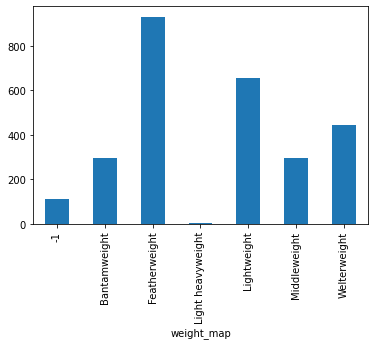

In [79]:
pl_w=players.groupby(['weight_map']).size()
pl_w.plot(kind='bar')

In [80]:
players["height"].dtypes

dtype('O')

Convert heights to feet

In [81]:
players["height"] = players["height"].str.replace("-", ".")


In [82]:
players["height"].astype(float)

0        6.1
1        6.0
2        6.0
3        6.1
4        6.1
        ... 
2727     6.3
2728     6.3
2729     5.9
2730    73.0
2731     5.1
Name: height, Length: 2732, dtype: float64

##### Function to write percent at the top of the graph

In [83]:
mask = players["height"].astype(float)
players = players[mask<7.5]
print(players)

      nflId height  weight  ... Position        displayName     weight_map
0     42901    6.1     208  ...       SS       Dean Marlowe  Featherweight
1     43501    6.0     220  ...       FS      Kavon Frazier  Featherweight
2     43534    6.0     205  ...       SS  Clayton Fejedelem  Featherweight
3     43535    6.1     235  ...      MLB   Tyler Matakevich    Lightweight
4     44174    6.1     236  ...      ILB       Sam Eguavoen    Lightweight
...     ...    ...     ...  ...      ...                ...            ...
2726  43511    6.2     242  ...      OLB      Aaron Wallace    Lightweight
2727  33216    6.3     320  ...        G        Josh Sitton   Middleweight
2728  33184    6.3     265  ...       DE      William Hayes    Lightweight
2729  45651    5.9     198  ...       WR     Riley McCarron  Featherweight
2731  42849   5.10     205  ...       WR    Bradley Marquez  Featherweight

[2579 rows x 8 columns]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Height Distribution')

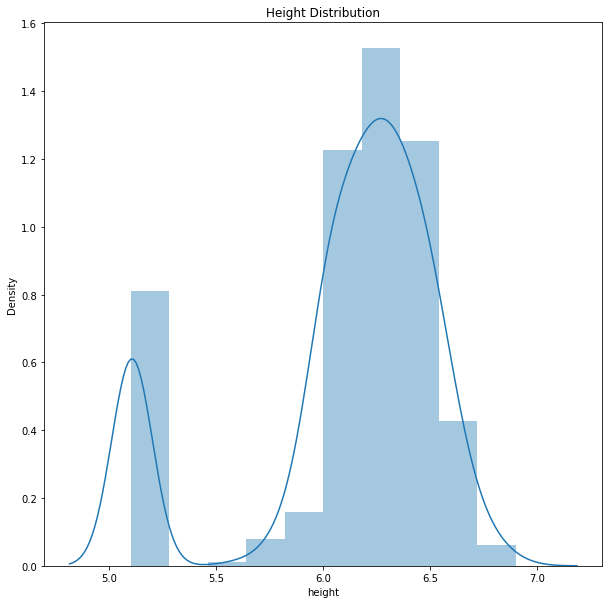

In [84]:
mpl.rc("font", size =10)
plt.figure(figsize=(10,10)) # set the size of the figure

ax = sns.distplot(players["height"], bins = 10)
ax.set_title("Height Distribution")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Weight Distribution')

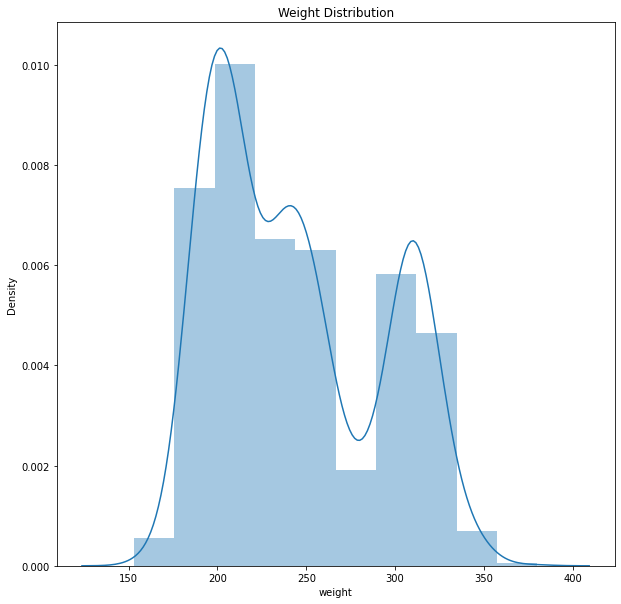

In [85]:
mpl.rc("font", size =10)
plt.figure(figsize=(10,10)) # set the size of the figure

ax = sns.distplot(players["weight"], bins = 10)
ax.set_title("Weight Distribution")

In [89]:
top_player_college = players["collegeName"].value_counts()[:20].reset_index()
print(top_player_college)

              index  collegeName
0           Alabama           65
1           Florida           55
2        Ohio State           54
3   Louisiana State           49
4           Georgia           45
5          Michigan           44
6        Notre Dame           43
7        Penn State           43
8           Clemson           41
9             Miami           40
10    Florida State           39
11         Stanford           37
12           Auburn           37
13       Washington           36
14             UCLA           36
15             Utah           35
16         Oklahoma           35
17        Wisconsin           34
18            Texas           33
19        Tennessee           33


In [90]:
top_player_college.columns = ["collegeName", "numberofPlayers"]

Text(0.5, 1.0, 'Distribution of top players across the best colleges')

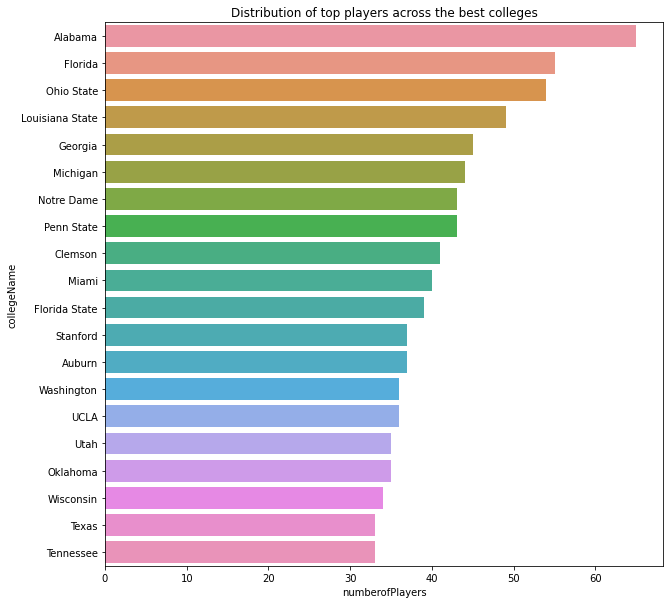

In [91]:
mpl.rc("font", size =10)
plt.figure(figsize=(10,10)) # set the size of the figure

ax = sns.barplot(x = "numberofPlayers", y = "collegeName", data = top_player_college)
ax.set_title("Distribution of top players across the best colleges")

## **Most top players come from Alabama, Florida and Ohio State**